In [1]:
import pandas as pd
import numpy as np
import sklearn
telcom = pd.read_csv('Customer-Churn.csv')
telcom.head()
df=telcom

## 1. PCA

## 1.Data standarlization

In [2]:
for col in telcom.select_dtypes([np.object]).columns:
    print('{}: {}\n'.format(col, df[col].unique()))

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']



/var/folders/hp/dlxjymcd33b9rhv6bm7dtfs80000gn/T/ipykernel_53576/2543975654.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in telcom.select_dtypes([np.object]).columns:


In [3]:
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)



In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Label encoding binary columns 01化
for i in bin_cols:
    telcom[i] = LabelEncoder().fit_transform(telcom[i])

#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Scaling Numerical columns 
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


## 2. Principel components analysis of data

In [5]:
from sklearn.decomposition import PCA
X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

In [6]:
print("explained_variance_ratio = ", pca.explained_variance_ratio_)

explained_variance_ratio =  [0.31286188 0.20323201 0.07468876]


In [7]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])

pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

In [8]:
pca_data.head()

,PC1,PC2,Churn,customerID
0,-1.313044,-1.745333,Not Churn,7590-VHVEG
1,-0.316646,-0.256294,Not Churn,5575-GNVDE
2,-1.168219,-1.532300,Churn,3668-QPYBK
3,-0.123340,0.349902,Not Churn,7795-CFOCW
4,-0.756303,-2.395677,Churn,9237-HQITU


## 3. K-means clustering

In [9]:
from sklearn.cluster import KMeans
X1 = pca_data[['PC1' ,'PC2']].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                           tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


#### Inertia (Squared Distance between Centroids and data points) 

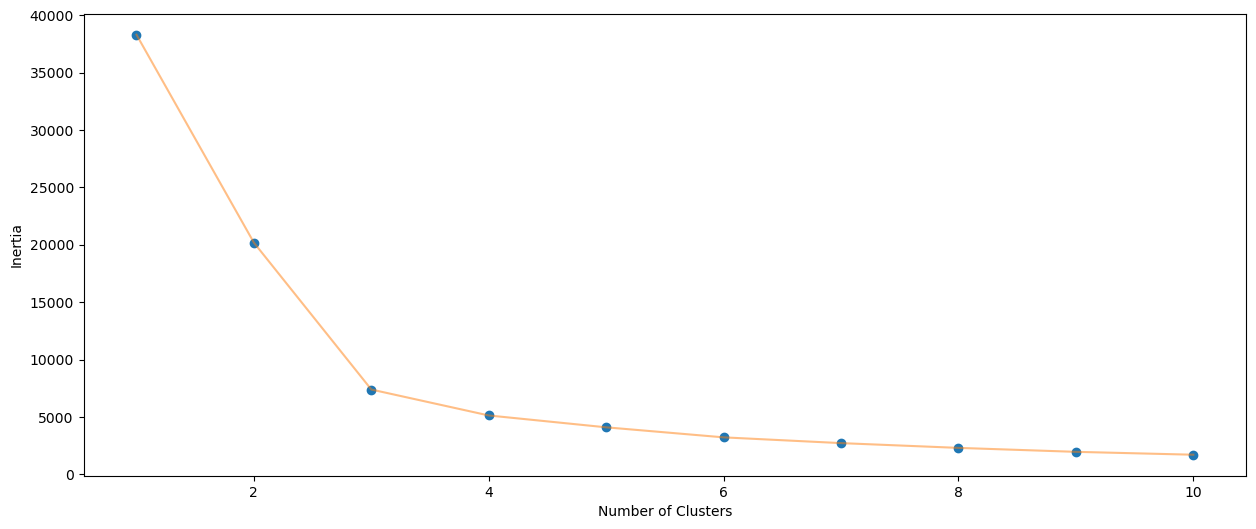

In [10]:
from matplotlib import pyplot as plt
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [11]:
algorithm_4 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                           tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans_data=algorithm_4.fit(X1)
labels = kmeans_data.labels_
label = pd.DataFrame(data=labels,index = pca_data['customerID'],columns = ["clusters"])
cluster_data = pd.merge(pca_data,label,on= 'customerID')
cluster_data

,PC1,PC2,Churn,customerID,clusters
0,-1.313044,-1.745333,Not Churn,7590-VHVEG,0
1,-0.316646,-0.256294,Not Churn,5575-GNVDE,3
2,-1.168219,-1.532300,Churn,3668-QPYBK,0
3,-0.123340,0.349902,Not Churn,7795-CFOCW,3
4,-0.756303,-2.395677,Churn,9237-HQITU,0
...,...,...,...,...,...
7027,0.852067,0.183195,Not Churn,6840-RESVB,3
7028,3.211270,1.379123,Not Churn,2234-XADUH,1
7029,-1.205139,-1.389423,Not Churn,4801-JZAZL,0
7030,-0.395599,-2.068985,Churn,8361-LTMKD,0


In [12]:
telcom_cluster = pd.merge(telcom,label,on= 'customerID')
telcom_cluster['clusters'].describe()

count    7032.000000
mean        1.406428
std         1.170953
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: clusters, dtype: float64

In [30]:
rate1=len(cluster_data.loc[(cluster_data['clusters'] == 0)& (cluster_data['Churn'] == 'Not Churn')])/len(cluster_data.loc[cluster_data['clusters'] == 0])
rate1

0.5022706630336058

In [31]:
rate2=len(cluster_data.loc[(cluster_data['clusters'] == 1)& (cluster_data['Churn'] == 'Not Churn')])/len(cluster_data.loc[cluster_data['clusters'] == 1])
rate2

0.8792207792207792

In [32]:
rate3=len(cluster_data.loc[(cluster_data['clusters'] == 2)& (cluster_data['Churn'] == 'Not Churn')])/len(cluster_data.loc[cluster_data['clusters'] == 2])
rate3

0.9256578947368421

In [33]:
rate4=len(cluster_data.loc[(cluster_data['clusters'] == 3)& (cluster_data['Churn'] == 'Not Churn')])/len(cluster_data.loc[cluster_data['clusters'] == 3])
rate4

0.7322033898305085

In [26]:
# K=3
algorithm_3 = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                           tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans_data=algorithm_3.fit(X1)
labels = kmeans_data.labels_
label = pd.DataFrame(data=labels,index = pca_data['customerID'],columns = ["clusters"])
cluster_data3 = pd.merge(pca_data,label,on= 'customerID')
cluster_data3

,PC1,PC2,Churn,customerID,clusters
0,-1.313044,-1.745333,Not Churn,7590-VHVEG,2
1,-0.316646,-0.256294,Not Churn,5575-GNVDE,2
2,-1.168219,-1.532300,Churn,3668-QPYBK,2
3,-0.123340,0.349902,Not Churn,7795-CFOCW,2
4,-0.756303,-2.395677,Churn,9237-HQITU,2
...,...,...,...,...,...
7027,0.852067,0.183195,Not Churn,6840-RESVB,1
7028,3.211270,1.379123,Not Churn,2234-XADUH,1
7029,-1.205139,-1.389423,Not Churn,4801-JZAZL,2
7030,-0.395599,-2.068985,Churn,8361-LTMKD,2


In [34]:
rate_1=len(cluster_data3.loc[(cluster_data3['clusters'] == 0)& (cluster_data3['Churn'] == 'Not Churn')])/len(cluster_data3.loc[cluster_data3['clusters'] == 0])
rate_1

0.9256578947368421

In [35]:
rate_2=len(cluster_data3.loc[(cluster_data3['clusters'] == 1)& (cluster_data3['Churn'] == 'Not Churn')])/len(cluster_data3.loc[cluster_data3['clusters'] == 1])
rate_2

0.8518041237113402

In [36]:
rate_3=len(cluster_data3.loc[(cluster_data3['clusters'] == 2)& (cluster_data3['Churn'] == 'Not Churn')])/len(cluster_data3.loc[cluster_data3['clusters'] == 2])
rate_3

0.5568467336683417